# Introduction
In this preliminary analysis, we are going to explore the data, and get the shape of the data by different groups, and finally briefly answer the first analysis question.

We are going to first explore the dataset that we have, get an initial idea of how our dataset looks like. For the **Initial Exploration** part, we plan to see data in 3 ways:

1. Data visualization of all faculties we have in number of articles, conference proceedings, grants, and patents by gender;
2. Data visualization of number of articles, conference proceedings, grants, and patents between departments;
3. Data visualization of faculties in number of articles, conference proceedings, grants, and patents from different departments by gender.

**Data & Package Loading**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/Users/jennywong/Documents/Senior I 2021 Fall/CS506/final_proj/CS506_private/code_data/data/faculties_with_gender.csv")

In [5]:
data_dept = data
data_overall = data.drop(columns=['Department']).drop_duplicates()

In [6]:
data_dept.shape, data_overall.shape

((749, 12), (692, 11))

# Initial Exploration

### 1. By gender

**Dataset Gender Check**

In [3]:
type = data['Gender'].unique()

type

array(['Male', 'Female'], dtype=object)

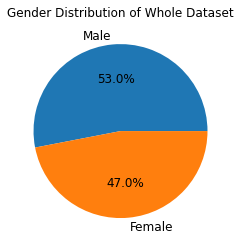

In [40]:
x = data_overall['Gender'].value_counts()
a, b, c = plt.pie(x, labels=['Male', 'Female'], autopct='%1.1f%%', textprops = {"fontsize":12})
a = plt.title("Gender Distribution of Whole Dataset")

In [19]:
y= data_overall['RankName'].value_counts()
y

Professor    385
Other        123
Associate    104
Assistant     80
Name: RankName, dtype: int64

In [99]:
temp = data['RankName'].value_counts()
temp

Professor    428
Other        123
Associate    115
Assistant     83
Name: RankName, dtype: int64

Text(0.5, 1.0, 'Rank distribution of whole dataset')

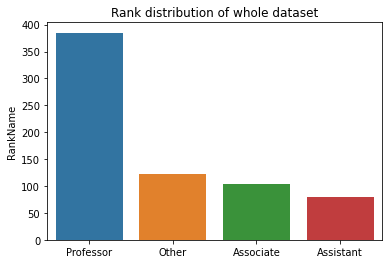

In [20]:
sns.barplot(y.index,y).set_title("Rank distribution of whole dataset")

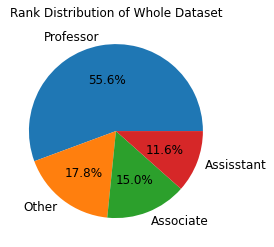

In [26]:
a, b, c = plt.pie(y, labels=['Professor', 'Other', 'Associate', 'Assisstant'], autopct='%1.1f%%', textprops = {"fontsize":12})
a = plt.title("Rank Distribution of Whole Dataset")

In [27]:
data_overall.groupby('Gender').describe()

Id                                                            \
        count         mean          std     min     25%     50%     75%   
Gender                                                                    
Female  325.0  7792.261538  7129.096378  1015.0  2760.0  4820.0  9825.0   
Male    367.0  6651.594005  6508.880303  1010.0  2287.5  4105.0  7332.5   

                TotalArticleCount              ... TotalPatentCount         \
            max             count        mean  ...              75%    max   
Gender                                         ...                           
Female  24180.0             325.0  117.329231  ...              8.0  181.0   
Male    24205.0             367.0  119.455041  ...             10.0  332.0   

       TotalCourseCount                                                
                  count      mean       std  min  25%  50%  75%   max  
Gender                                                                 
Female            325.0  1.513846  1.263431  0.0  0.0  2.0  2.0   6.0  
Male              367.0  1.643052  1.577021  0.0  0.0  2.0  2.0  13.0  

[2 rows x 48 columns]

**Patent Distribution**

In [21]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, 3*y[i]//4, y[i], fontsize=12, ha = 'center',
                Bbox = dict(facecolor = 'white', alpha =.8))

In [22]:
df_Patent_count = data_overall.groupby('Gender')['TotalPatentCount'].sum()
df_Patent_count

Gender
Female    2764
Male      4045
Name: TotalPatentCount, dtype: int64

Text(0.5, 0, 'Gender')

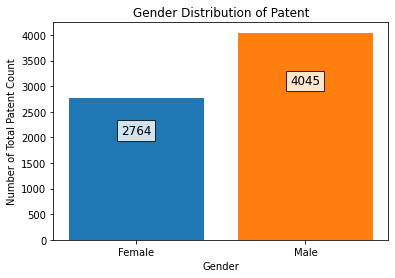

In [25]:
plt.bar(df_Patent_count.index,df_Patent_count, color=['tab:blue', 'tab:orange'])
addlabels(df_Patent_count.index,df_Patent_count)
plt.title("Gender Distribution of Patent")
plt.ylabel("Number of Total Patent Count")
plt.xlabel("Gender")

**Article Distribution**

In [27]:
df_Article_count = data_overall.groupby('Gender')['TotalArticleCount'].sum()
df_Article_count

Gender
Female    38132
Male      43840
Name: TotalArticleCount, dtype: int64

Text(0.5, 0, 'Gender')

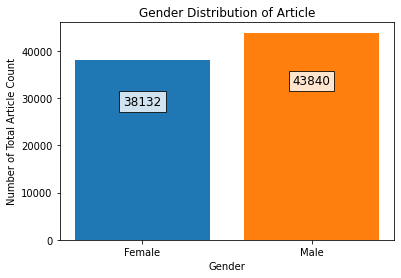

In [29]:
plt.bar(df_Article_count.index,df_Article_count, color=['tab:blue', 'tab:orange'])
addlabels(df_Article_count.index,df_Article_count)
plt.title("Gender Distribution of Article")
plt.ylabel("Number of Total Article Count")
plt.xlabel("Gender")

**Conference Proceeding Distribution**

In [30]:
df_Conf_count = data_overall.groupby('Gender')['TotalConfProcCount'].sum()
df_Conf_count

Gender
Female     8784
Male      10534
Name: TotalConfProcCount, dtype: int64

Text(0.5, 0, 'Gender')

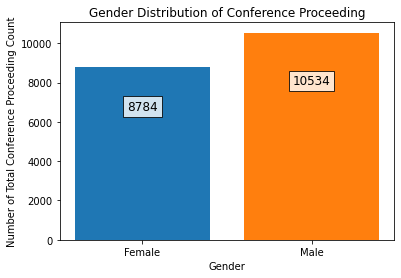

In [32]:
plt.bar(df_Conf_count.index,df_Conf_count, color=['tab:blue', 'tab:orange'])
addlabels(df_Conf_count.index,df_Conf_count)
plt.title("Gender Distribution of Conference Proceeding")
plt.ylabel("Number of Total Conference Proceeding Count")
plt.xlabel("Gender")

**Grant Distribution**

In [33]:
df_Grant_count = data_overall.groupby('Gender')['TotalGrantCount'].sum()
df_Grant_count

Gender
Female    4103
Male      5393
Name: TotalGrantCount, dtype: int64

Text(0.5, 0, 'Gender')

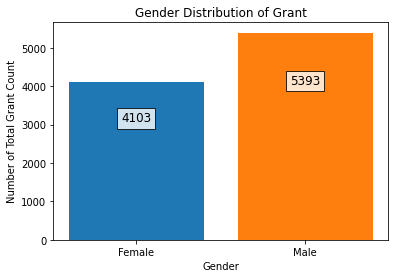

In [36]:
plt.bar(df_Grant_count.index,df_Grant_count, color=['tab:blue', 'tab:orange'])
addlabels(df_Grant_count.index,df_Grant_count)
plt.title("Gender Distribution of Grant")
plt.ylabel("Number of Total Grant Count")
plt.xlabel("Gender")

In [37]:
gender_patent=data_overall.groupby("Gender").agg({"TotalPatentCount":"sum"}).reset_index().rename(columns={"TotalPatentCount":"Patent_amount"})
gender_patent

,Gender,Patent_amount
0,Female,2764
1,Male,4045


In [38]:
l = data_overall
l = l.drop(columns = ["Id"])
l.groupby( ["Gender","TotalPatentCount"]).agg([np.sum, np.mean, np.std])

TotalArticleCount                          \
                                      sum        mean         std   
Gender TotalPatentCount                                             
Female 0                            16551  123.514925  206.396499   
       1                             2488   77.750000   65.650590   
       2                             1385   53.269231   41.017613   
       3                              974   88.545455   43.644848   
       4                              492   61.500000   24.853859   
...                                   ...         ...         ...   
Male   105                            527  527.000000         NaN   
       125                            171  171.000000         NaN   
       153                            609  609.000000         NaN   
       165                            114  114.000000         NaN   
       332                            975  975.000000         NaN   

                        TotalConfProcCount                        \
                                       sum       mean        std   
Gender TotalPatentCount                                            
Female 0                              1507  11.246269  17.785031   
       1                               647  20.218750  23.360753   
       2                               482  18.538462  33.571691   
       3                               210  19.090909  27.057179   
       4                               117  14.625000  30.217958   
...                                    ...        ...        ...   
Male   105                               3   3.000000        NaN   
       125                              55  55.000000        NaN   
       153                              21  21.000000        NaN   
       165                               5   5.000000        NaN   
       332                              26  26.000000        NaN   

                        TotalGrantCount                        \
                                    sum       mean        std   
Gender TotalPatentCount                                         
Female 0                           1180   8.805970  10.979460   
       1                            449  14.031250  12.601803   
       2                            240   9.230769   8.262240   
       3                            156  14.181818   9.357544   
       4                             82  10.250000   9.513149   
...                                 ...        ...        ...   
Male   105                           10  10.000000        NaN   
       125                           29  29.000000        NaN   
       153                            0   0.000000        NaN   
       165                           11  11.000000        NaN   
       332                           92  92.000000        NaN   

                        TotalCourseCount                      
                                     sum      mean       std  
Gender TotalPatentCount                                       
Female 0                             175  1.305970  1.151838  
       1                              44  1.375000  1.313700  
       2                              37  1.423077  1.501282  
       3                              19  1.727273  1.348400  
       4                              14  1.750000  1.281740  
...                                  ...       ...       ...  
Male   105                             4  4.000000       NaN  
       125                             2  2.000000       NaN  
       153                             1  1.000000       NaN  
       165                             2  2.000000       NaN  
       332                             2  2.000000       NaN  

[110 rows x 12 columns]

This part we group the data we have by gender and the number of patents. We can check if there are certain connections between the number of patent and the number of other attributes (e.g. article number, course number, etc)

In [39]:
z = data_overall
z = z.drop(columns = ["Id","Name","FirstName","LastName"])
z= z.groupby(['Gender','RankName']).count()
z

TotalArticleCount  TotalConfProcCount  TotalGrantCount  \
Gender RankName                                                            
Female Assistant                 46                  46               46   
       Associate                 49                  49               49   
       Other                     53                  53               53   
       Professor                177                 177              177   
Male   Assistant                 34                  34               34   
       Associate                 55                  55               55   
       Other                     70                  70               70   
       Professor                208                 208              208   

                  TotalPatentCount  TotalCourseCount  
Gender RankName                                       
Female Assistant                46                46  
       Associate                49                49  
       Other                    53                53  
       Professor               177               177  
Male   Assistant                34                34  
       Associate                55                55  
       Other                    70                70  
       Professor               208               208

Based on different genders, we check if rankname affect the number of total patents, articles, courses, conferences those staff have.

### 2. Between departments

**All departments**

In [8]:
dlist = data['Department'].unique()
print("All the departments (faculties with gender) in the data:")
for a in dlist:
    print(a)
print("There are", len(dlist), "departments in total in our dataset.")

All the departments (faculties with gender) in the data:
Aeronautics and Astronautics
Physics
Media Arts and Sciences
Biological Engineering
Mechanical Engineering
Materials Science and Engineering
Biology
Chemical Engineering
Chemistry
Electrical Engineering and Computer Sciences
Nuclear Science and Engineering
Civil and Environmental Engineering
Brain and Cognitive Sciences
There are 13 departments in total in our dataset.


**Number of departments in data**

In [10]:
dinfo = data['Department'].value_counts()
print("Number of professors in each department:")
print(dinfo)

Number of professors in each department:
Physics                                         100
Electrical Engineering and Computer Sciences    100
Mechanical Engineering                           99
Biology                                          71
Brain and Cognitive Sciences                     53
Aeronautics and Astronautics                     51
Materials Science and Engineering                47
Chemistry                                        42
Biological Engineering                           42
Chemical Engineering                             41
Civil and Environmental Engineering              39
Nuclear Science and Engineering                  35
Media Arts and Sciences                          29
Name: Department, dtype: int64


Professors in "Science" fields appear more frequenltly in the dataset.

**Article Count**

Department
Aeronautics and Astronautics                     2790
Biological Engineering                           6487
Biology                                          8891
Brain and Cognitive Sciences                     5372
Chemical Engineering                             7205
Chemistry                                        6208
Civil and Environmental Engineering              3346
Electrical Engineering and Computer Sciences     8808
Materials Science and Engineering                6590
Mechanical Engineering                          10632
Media Arts and Sciences                          1218
Nuclear Science and Engineering                  2892
Physics                                         21425
Name: TotalArticleCount, dtype: int64


Mean:
Department
Aeronautics and Astronautics                     54.705882
Biological Engineering                          154.452381
Biology                                         125.225352
Brain and Cognitive Sciences                    101.3

Text(0, 0.5, 'Average Number of Articles')

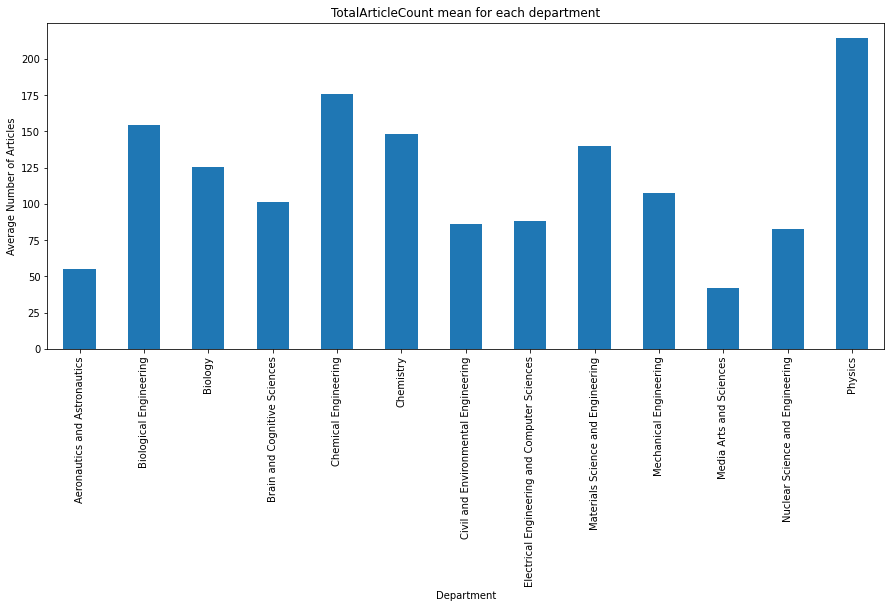

In [16]:
Tacs = data.groupby('Department')['TotalArticleCount'].sum()
print(Tacs)

print('\n')

print("Mean:")

Tacm = data.groupby('Department')['TotalArticleCount'].mean()
print(Tacm)

print('\n')

Tacm.plot.bar(figsize=(15,6), title="TotalArticleCount mean for each department").set_ylabel("Average Number of Articles")

"Physics" department has the highest TotalArticleCount and the highest AverageTotalArticleCount;

"Media Arts and Sciences" department has the lowest TotalArticleCount and the lowest AverageTotalArticleCount.

**Conference Proceeding Count**

Department
Aeronautics and Astronautics                    2481
Biological Engineering                           251
Biology                                          181
Brain and Cognitive Sciences                     610
Chemical Engineering                             188
Chemistry                                        382
Civil and Environmental Engineering              778
Electrical Engineering and Computer Sciences    6917
Materials Science and Engineering               1140
Mechanical Engineering                          3296
Media Arts and Sciences                         1449
Nuclear Science and Engineering                  306
Physics                                         2106
Name: TotalConfProcCount, dtype: int64


Mean:
Department
Aeronautics and Astronautics                    48.647059
Biological Engineering                           5.976190
Biology                                          2.549296
Brain and Cognitive Sciences                    11.509434
Chemical E

Text(0, 0.5, 'Average Number of Conference Proceedings')

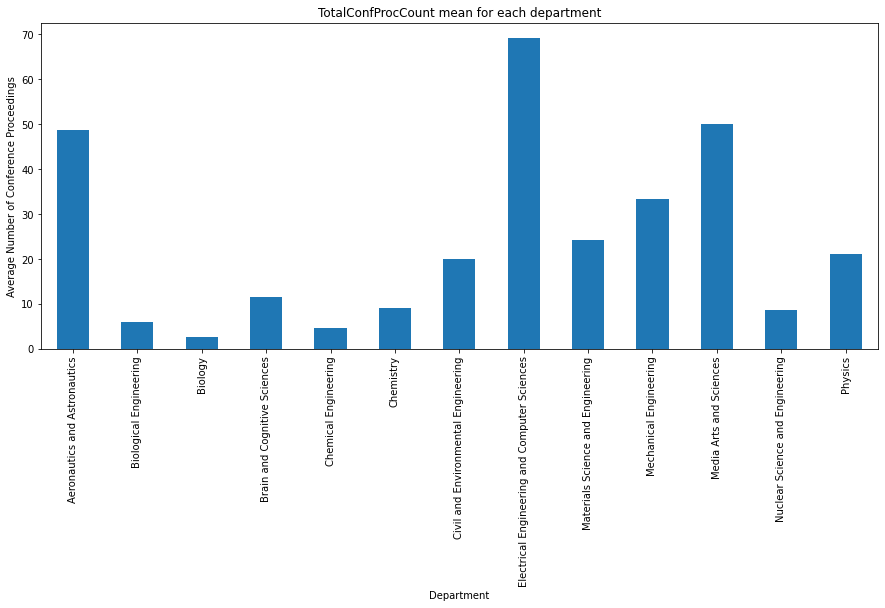

In [17]:
Tcpcs = data.groupby('Department')['TotalConfProcCount'].sum()
print(Tcpcs)

print('\n')

print("Mean:")

Tcpcm = data.groupby('Department')['TotalConfProcCount'].mean()
print(Tcpcm)

print('\n')

Tcpcm.plot.bar(figsize=(15,6), title="TotalConfProcCount mean for each department").set_ylabel("Average Number of Conference Proceedings")

"Electrical Engineering and Computer Sciences" department has the highest TotalConfProcCount and the highest AverageTotalConfProcCount;

"Biology" department has the lowest TotalConfProcCount and the lowest AverageTotalConfProcCount.


**Patent Count**

Department
Aeronautics and Astronautics                     179
Biological Engineering                           936
Biology                                          328
Brain and Cognitive Sciences                     358
Chemical Engineering                             991
Chemistry                                        579
Civil and Environmental Engineering               61
Electrical Engineering and Computer Sciences    1252
Materials Science and Engineering                869
Mechanical Engineering                          1732
Media Arts and Sciences                          443
Nuclear Science and Engineering                   68
Physics                                          309
Name: TotalPatentCount, dtype: int64


Mean:
Department
Aeronautics and Astronautics                     3.509804
Biological Engineering                          22.285714
Biology                                          4.619718
Brain and Cognitive Sciences                     6.754717
Chemical Eng

Text(0, 0.5, 'Average Number of Patents')

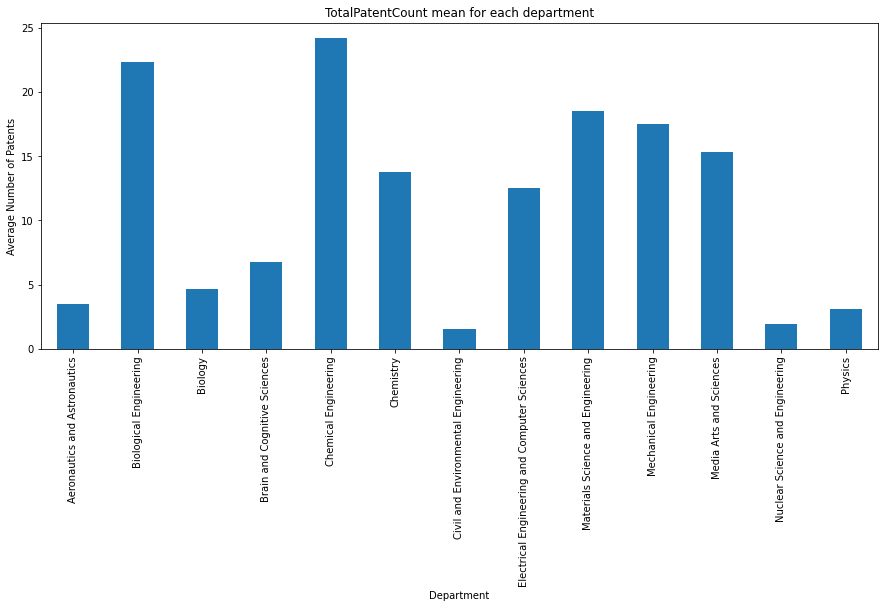

In [18]:
Tpcs = data.groupby('Department')['TotalPatentCount'].sum()
print(Tpcs)

print('\n')

print("Mean:")

Tpcm = data.groupby('Department')['TotalPatentCount'].mean()
print(Tpcm)

print('\n')

Tpcm.plot.bar(figsize=(15,6), title="TotalPatentCount mean for each department").set_ylabel("Average Number of Patents")

"Mechanical Engineering" department has the highest TotalPatentCount BUT "Biological Engineering" has the highest AverageTotalPatentCount;

"Civil and Environmental Engineering" department has the lowest TotalPatentCount and the lowest AverageTotalPatentCount.

**Grant Count**

Department
Aeronautics and Astronautics                    1073
Biological Engineering                           967
Biology                                          689
Brain and Cognitive Sciences                     602
Chemical Engineering                             611
Chemistry                                        619
Civil and Environmental Engineering              420
Electrical Engineering and Computer Sciences    1811
Materials Science and Engineering                552
Mechanical Engineering                          1400
Media Arts and Sciences                          302
Nuclear Science and Engineering                  286
Physics                                         1446
Name: TotalGrantCount, dtype: int64


Mean:
Department
Aeronautics and Astronautics                    21.039216
Biological Engineering                          23.023810
Biology                                          9.704225
Brain and Cognitive Sciences                    11.358491
Chemical Engi

Text(0, 0.5, 'Average Number of Grants')

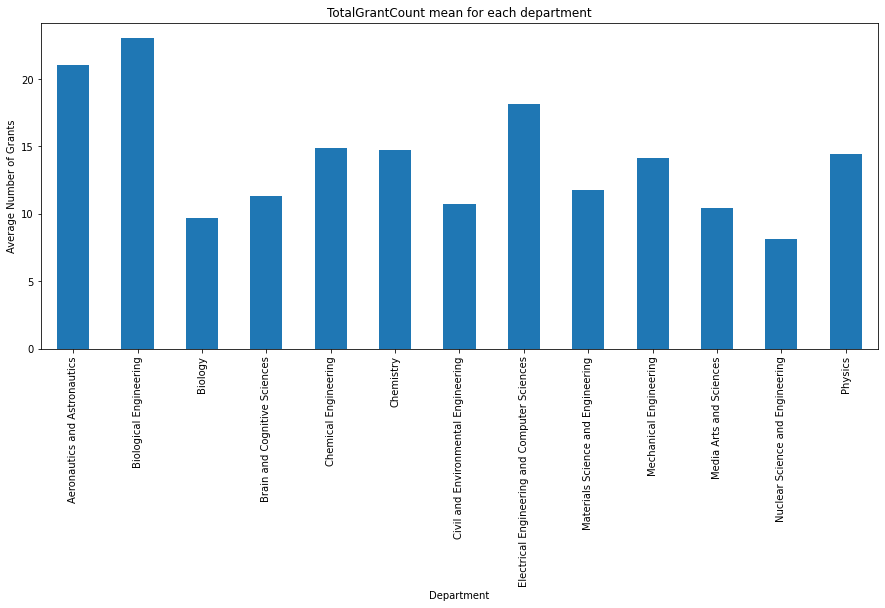

In [19]:
Tgcs = data.groupby('Department')['TotalGrantCount'].sum()
print(Tgcs)

print('\n')

print("Mean:")

Tgcm = data.groupby('Department')['TotalGrantCount'].mean()
print(Tgcm)

print('\n')

Tgcm.plot.bar(figsize=(15,6), title="TotalGrantCount mean for each department").set_ylabel("Average Number of Grants")

"Electrical Engineering and Computer Sciences" department has the highest TotalGrantCount BUT "Biological Engineering" has the highest AverageTotalGrantCount;

"Nuclear Science and Engineering" department has the lowest TotalGrantCount and the lowest AverageTotalGrantCount.

In general, for [TotalConfProcCount] and [TotalArticleCount] the highest, lowest, Averagehighest and Averagelowest is the same department;

BUT for [TotalPatentCount] and [TotalGrantCount] the highest and Averagehighest are different, for lowest and Averagelowest are still the same.

### 3. Gender difference in each department

In [54]:
dg = data_dept.groupby(['Department', 'Gender']).count().reset_index()[['Department', 'Gender', 'Id']]
# dg = dg.set_index('Department')
dg.head()

,Department,Gender,Id
0,Aeronautics and Astronautics,Female,20
1,Aeronautics and Astronautics,Male,31
2,Biological Engineering,Female,16
3,Biological Engineering,Male,26
4,Biology,Female,32


In [97]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0, 0.5, 'Number of Faculty')

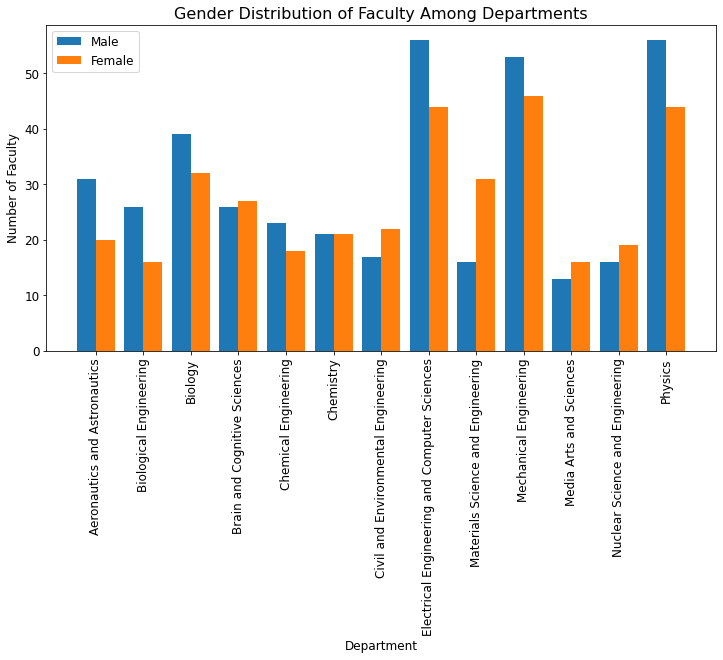

In [98]:
plt.figure(figsize=(12, 6))
labels = list(dg.Department.drop_duplicates())
x = np.arange(len(labels))
width = 0.4
plt.bar(x-width/2, dg[dg.Gender=='Male'].Id, width)
plt.bar(x+width/2, dg[dg.Gender=='Female'].Id, width)
z = plt.xticks(x, labels=labels, rotation=90)
plt.title("Gender Distribution of Faculty Among Departments")
plt.legend(['Male', 'Female'])
plt.xlabel("Department")
plt.ylabel("Number of Faculty")
# list(dg.Department.drop_duplicates())
# dg[dg.Gender=='Female'].Id

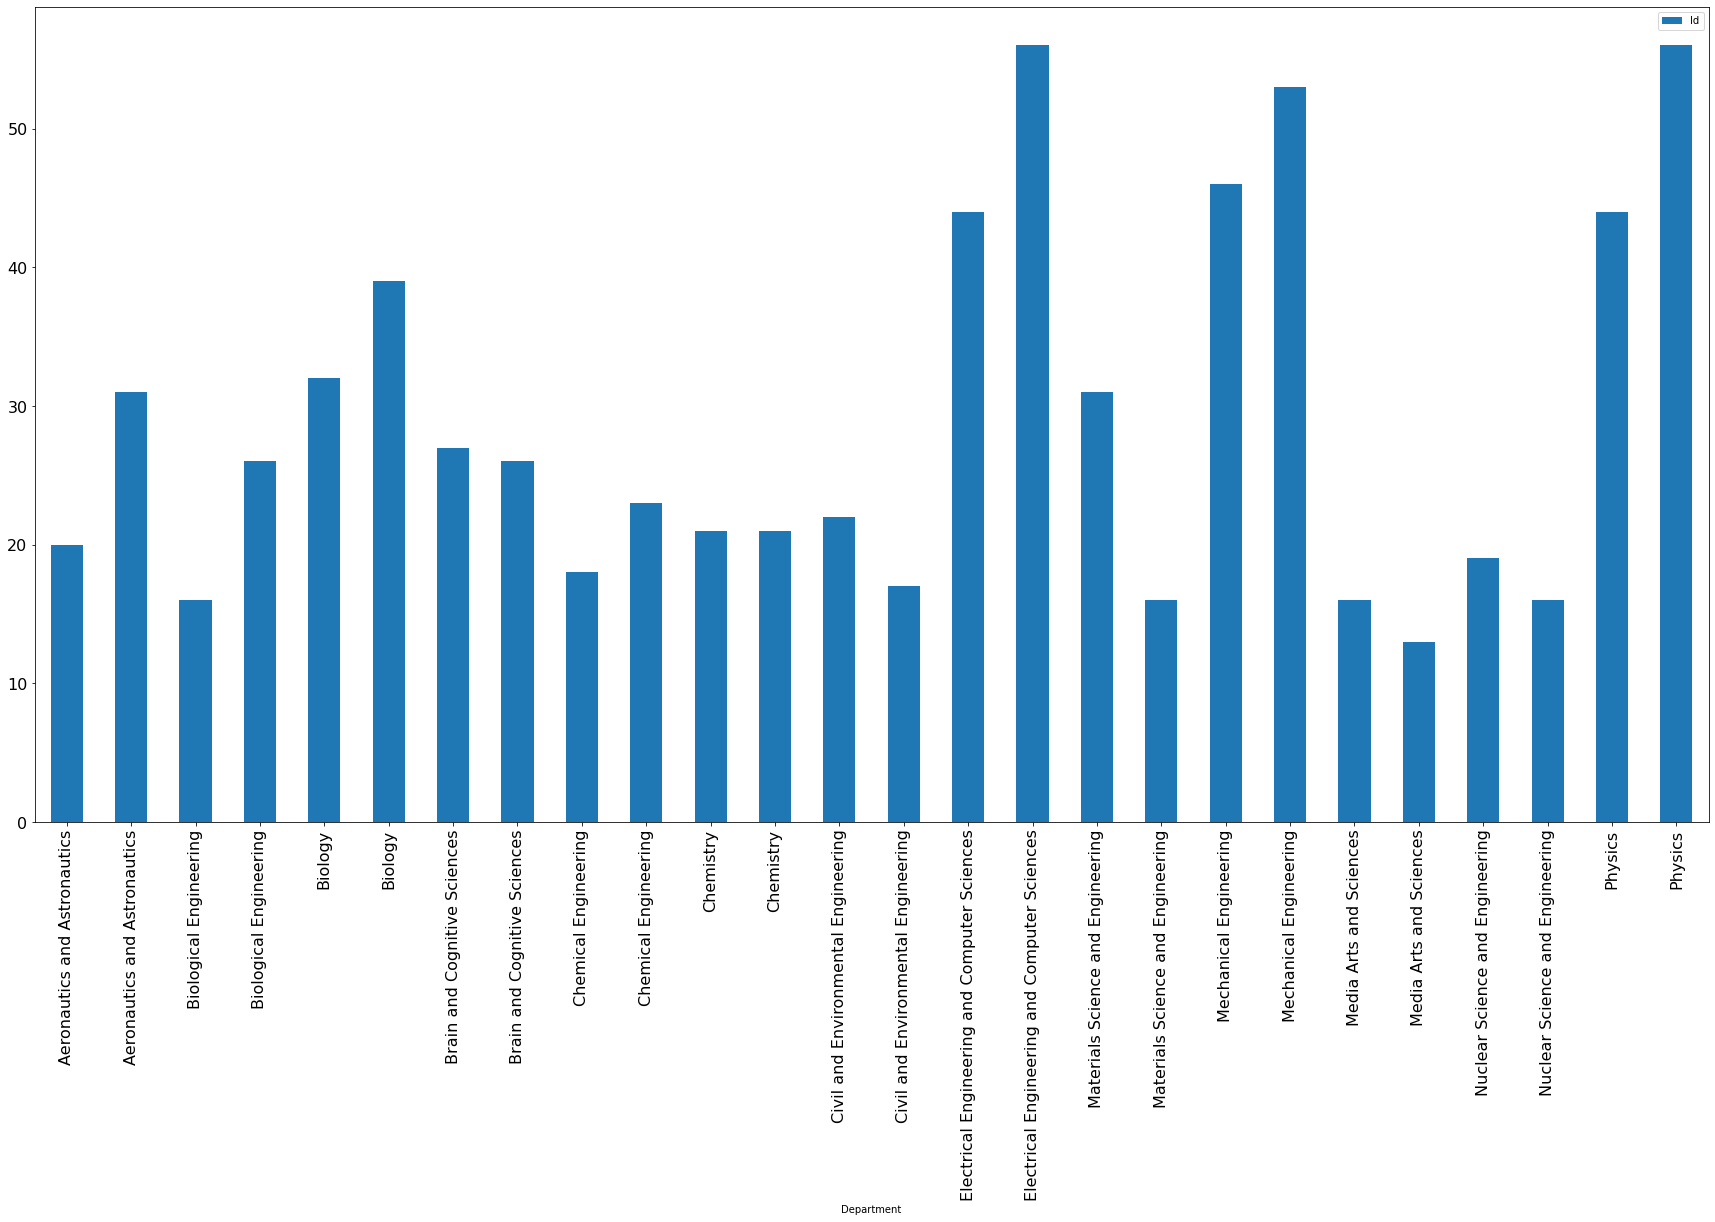

In [49]:
ax = dg.plot.bar(rot=0, figsize=(30, 15), fontsize= 16)
z = ax.set_xticklabels(dg.index,rotation=90)

# Conclusion

Based on the graphical analysis based on whole dataset by gender, by department, and by gender per department, we found out that there's an apparently comparison between the female and male results in all 4 categories, article, patent, grant, and conference proceeding, that we have looked at.

On an overall basis, male has a comparatively larger number of people than female, but the difference in each department varies, as the graph right above shows.